<a href="https://colab.research.google.com/github/nitinfaye/Convolutional-Neural-Network/blob/main/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. Examples of classification problems include: Given an example, classify if it is spam or not. Given a handwritten character, classify it as one of the known characters

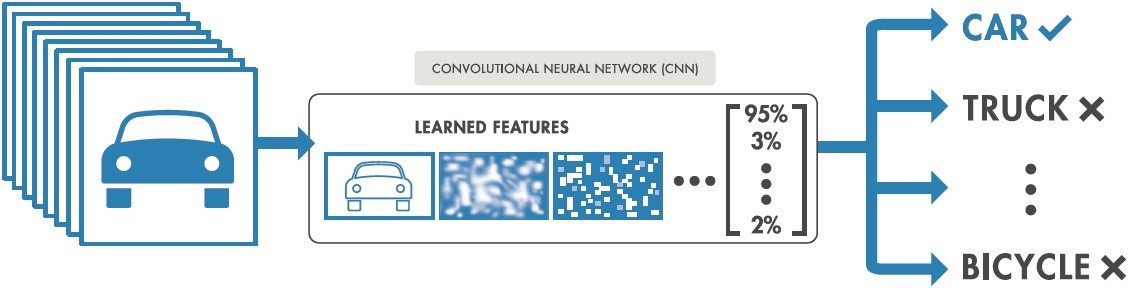

In [1]:
## to ignore all the warning 

import warnings
warnings.filterwarnings('ignore')

# Step 1: Import the Data

In [2]:
# the data set is present in the drive in the zip format. 
# we will be using linix cammand to import our data set 
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip

--2022-01-22 14:21:22--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2022-01-22 14:21:23--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0182f0e1eec8c139092a2d18d9.dl.dropboxusercontent.com/cd/0/inline/BeTIM9LqACeej51tCCNcdXX_5-8CxyD6fHN2Mg0BhRAc_Uv3Z2PxmPHcD8humecxkqHRZTroZSYD4anSJTe5-MhJp2sP0rhIHGef0_KsemOSy7sNY6a7zVrrmn2cENptVzrBX79-Q9GV3-1P25RHp3MC/file# [following]
--2022-01-22 14:21:23--  https://uc0182f0e1eec8c139092a2d18d9.dl.dropboxusercontent.com/cd/0/inline/BeTIM9LqACeej51tCCNcdXX_5-8CxyD6fHN2Mg0BhRAc_Uv3Z2PxmPHcD8humecxkqHRZTroZSY

In [3]:
# In the next step we will unzip our data set using the linix command i.e "!unzip"
!unzip "/content/training_set.zip"
!rm "/content/training_set.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [4]:
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip
!unzip test_set.zip
!rm test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [5]:
# imports 

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from skimage.io import imread, imshow
import shutil
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPool2D
from keras.preprocessing.image import load_img, img_to_array

#Step 2: Data Visualization & Preprocessing

In [6]:
# now we will visualise and see how many images are there in our data set 
# this is a important step for data pre preocessing as it is essential to ensure our data is balanced 

TRAIN_DIR = "/content/training_set/training_set" 

dict = {'cats':0 , 'dogs': 0}

for dir in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, dir)
  dict[dir] = len(os.listdir(path))
  print(len(os.listdir(path)))

4001
4006


In [7]:
dict

{'cats': 4001, 'dogs': 4006}

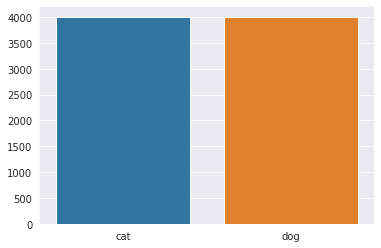

In [8]:
# Now lets visualise our classes 

sns.set_style('darkgrid')

x = ['cat', 'dog']
y = [dict['cats'] , dict['dogs']]

sns.barplot(x,y)
plt.show()

In [9]:
# lets creates a function that can show the images 
def desplay_images(img_dir):
  """
  * Input  : list of image directories
  * Output : prints out the images in the list 
  """
  i = 1
  plt.figure(figsize= (10,10))
  for img in img_dir:
    plt.subplot(1,3,i)
    plt.axis(False)
    imshow(img)
    i += 1
  plt.show()


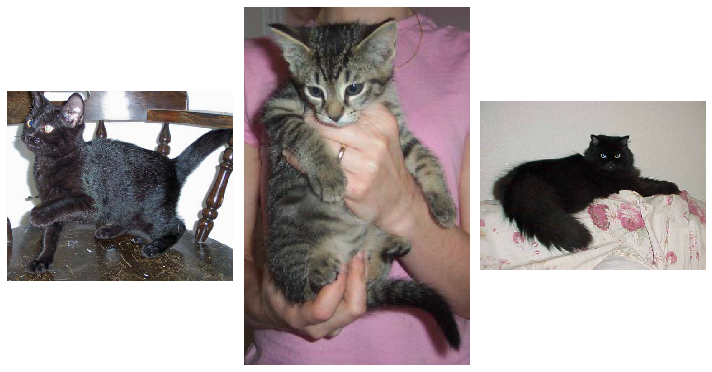

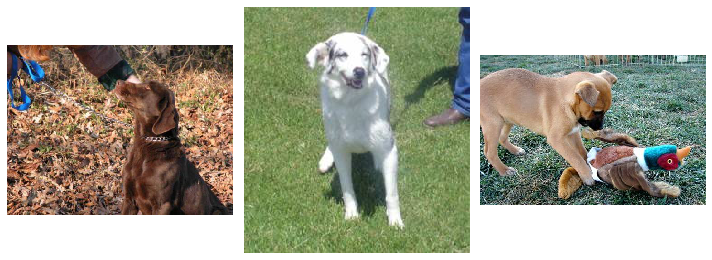

In [10]:
# this for loop will call the function display images. 
# we will be plotting three images from each classes

for dir in os.listdir(TRAIN_DIR):
  ipath = os.path.join(TRAIN_DIR, dir)
  count = 0
  img_dirs = []
  for i , img in enumerate( os.listdir(ipath) ):
    img_path = os.path.join(ipath, img)
    img_dirs.append(img_path)
    if i == 2:
      break
  desplay_images(img_dir = img_dirs)
  

## Split the images between train test and validation

# we have created the folder called data_dir  


*   Taining data will have 70 % of data
*   Validation and Test will have 15% of data



In [11]:
TRAIN_DIR = "/content/training_set/training_set"

dirs = ['train', 'val' , 'test']

ROOT_DIR = "./data_dir"

if not os.path.exists(ROOT_DIR):
  for d in dirs:
    os.makedirs( os.path.join(ROOT_DIR, d) )

for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"train",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.7) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = os.path.join(de,img)
    shutil.copyfile(org, dest )
    os.remove(org)
    
for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"val",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))*0.5) , replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)


for dir in os.listdir(TRAIN_DIR):
  de = os.path.join(ROOT_DIR,"test",dir)
  os.mkdir(de)
  for img in np.random.choice( os.listdir(os.path.join(TRAIN_DIR, dir)),  int(len(os.listdir(os.path.join(TRAIN_DIR, dir)))), replace= False ) :
    org = os.path.join(TRAIN_DIR, dir,img)
    dest = dest = os.path.join(de,img)

    shutil.copyfile(org, dest )
    os.remove(org)


## Lets Now try to visualize how our data is distributed !

In [12]:
ROOT_DIR = "/content/data_dir"

x = []
y = []
for folder in os.listdir(ROOT_DIR):
  dict = {'cat':0 , 'dog': 0}

  class_dir = os.path.join(ROOT_DIR, folder)
  
  for cls in os.listdir(class_dir):
    images = os.path.join(class_dir,cls)
    dict[cls] = len(os.listdir(images) )


    y.append(dict[cls])
    x.append(f"{folder}_{cls}")
  

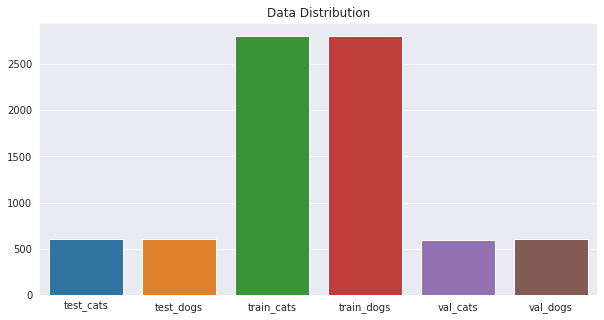

In [13]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
a = sns.barplot(x,y).set_title("Data Distribution")
plt.show()

# Using ImageDataGenerator function from keras to load and preprocess images 

In [14]:
# we will now use keras module to pre-process our images 

traindatagen = ImageDataGenerator(
                                  rescale= 1./255,
                                  rotation_range= 0.2,
                                  zoom_range= 0.2,
                                  horizontal_flip= True
                                  )

train_data = traindatagen.flow_from_directory(directory= "/content/data_dir/train", class_mode='binary',
                                         target_size=(224,224) )  

Found 5602 images belonging to 2 classes.


In [15]:
# what number representss the class 
train_data.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
# reversing our dictionary for future use 

CLASS_IDX ={ j: i for i,j in train_data.class_indices.items() }
CLASS_IDX

{0: 'cats', 1: 'dogs'}

In [17]:
valdatagen = ImageDataGenerator( rescale= 1./255 )

val_data = valdatagen.flow_from_directory(directory= "/content/data_dir/val", class_mode='binary',
                                         target_size=(224,224) ) 

Found 1201 images belonging to 2 classes.


In [18]:
testdatagen = ImageDataGenerator( rescale= 1./255 )

test_data = testdatagen.flow_from_directory(directory= "/content/data_dir/test", class_mode='binary',
                                         target_size=(224,224) ) 

Found 1202 images belonging to 2 classes.


# Step 3: Build Model

In [19]:
model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, 
              optimizer='adam', 
              metrics=['accuracy'] )
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
#model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )

In [20]:

## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')


# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [21]:
hist = model.fit_generator(generator=train_data , 
                           validation_data= val_data, 
                           validation_steps= 16,
                           steps_per_epoch= 32 , 
                           epochs= 30, 
                           verbose= 1, 
                           callbacks = call_back )

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.8240 - accuracy: 0.5010
Epoch 00001: val_accuracy improved from -inf to 0.49805, saving model to best_model.h5
32/32 [==============================] - 28s 553ms/step - loss: 0.8240 - accuracy: 0.5010 - val_loss: 0.6976 - val_accuracy: 0.4980
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.5088
Epoch 00002: val_accuracy improved from 0.49805 to 0.51562, saving model to best_model.h5
32/32 [==============================] - 18s 556ms/step - loss: 0.6943 - accuracy: 0.5088 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.6908 - accuracy: 0.5225
Epoch 00003: val_accuracy did not improve from 0.51562
32/32 [==============================] - 17s 544ms/step - loss: 0.6908 - accuracy: 0.5225 - val_loss: 0.6841 - val_accuracy: 0.4980
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.4

In [22]:

# Loading the best fit model 
from keras.models import load_model

model = load_model("/content/best_model.h5")

# Step 4: Model Validation 

In [23]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

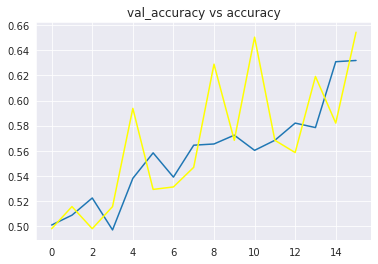

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="yellow")
plt.title("val_accuracy vs accuracy")
plt.show()

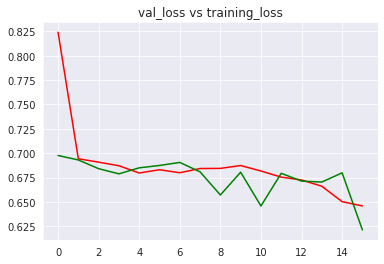

In [25]:
plt.plot(h['loss'], c = 'red')
plt.plot(h['val_loss'] ,c="green")
plt.title("val_loss vs training_loss")
plt.show()

In [26]:
# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test_data )[1] 

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 66.47254824638367 %


## Lets test our model by passing a unique value. 
## Every time we run the below block of code a unique image is fetch and the model gives a predictions 

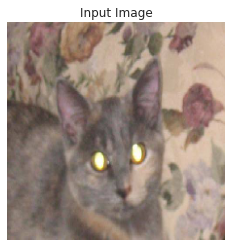

########################################################################################
(224, 224, 3) is the dimention of image before expansion 

(1, 224, 224, 3) is the dimention of image after expansion 
########################################################################################
 Prediction from deep learning model : cats 


In [27]:
# shift+enter
TEST_DIR = "/content/data_dir/test/cats"
img = np.random.choice(os.listdir(TEST_DIR), 1 )[0]
image = img_to_array(load_img( os.path.join( TEST_DIR, img), target_size=(224,224) ))/255

plt.imshow(image)
plt.title("Input Image")
plt.axis(False)
plt.show()

print("########################################################################################")

print( f"{image.shape} is the dimention of image before expansion ")
#expanding the dimension so that it can be fit inside the model
image = np.expand_dims( image, axis= 0) 
print()
print( f"{image.shape} is the dimention of image after expansion ")

print("########################################################################################")

# Now lets see what our model predicts for our image 

pred = int(model.predict(image) >0.5)
print( f" Prediction from deep learning model : {CLASS_IDX[pred]} ")